# Sample Notebook 2 for Picasso
This notebook shows some basic interaction with the ``picasso`` library. It assumes to have a working picasso installation, for example, from PyPI (see: https://github.com/jungmannlab/picasso?tab=readme-ov-file#via-pypi).

As you will see below, many values, such as x and y coordinates are saved in the units of camera pixel size. For more details, see https://picassosr.readthedocs.io/en/latest/files.html#localization-hdf5-files.

The sample data was created using Picasso:Simulate.

## Load Localizations

In [1]:
import os.path as ospath
import numpy as np
import matplotlib.pyplot as plt
from picasso import io, aim, postprocess, render
path = 'data/raw_movie_locs.hdf5'
locs, info = io.load_locs(path)

print(f'Loaded {len(locs)} locs.')
locs.head(5)

Loaded 2399 locs.


,frame,x,y,photons,sx,sy,bg,lpx,lpy,ellipticity,net_gradient
0,2,25.577694,23.390852,2726.332764,0.840439,0.852427,36.674107,0.024357,0.024668,0.014063,6020.876465
1,4,25.570528,23.395626,2662.613037,0.902836,0.860956,39.837715,0.026629,0.025511,0.046387,5863.750000
2,5,25.622553,23.387604,2728.365723,0.843607,0.871191,40.550835,0.024639,0.025362,0.031663,6260.936523
3,6,25.522259,23.429758,2828.362549,0.869489,0.917426,38.667923,0.024848,0.026085,0.052251,5956.500488
4,15,8.463214,20.024517,5371.983887,0.866434,0.890847,36.769318,0.017287,0.017726,0.027405,12072.339844


In [2]:
# Summary statistics
locs.describe()

,frame,x,y,photons,sx,sy,bg,lpx,lpy,ellipticity,net_gradient
count,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000,2399.000000
mean,2400.694039,14.210602,16.663191,5840.870605,0.878801,0.871979,42.291435,0.018848,0.018737,0.024737,13409.862305
std,1440.586301,4.661649,5.879419,2973.533936,0.097646,0.083435,12.622068,0.005650,0.005617,0.046073,6639.604980
min,2.000000,8.463214,7.556459,1442.730225,0.742131,0.728386,-48.022243,0.008150,0.008407,0.000007,3512.745850
25%,1129.000000,11.280156,8.468384,3623.458496,0.858428,0.857364,38.915249,0.014714,0.014608,0.007649,8238.303223
50%,2260.000000,13.567043,19.030941,5472.675781,0.870440,0.869625,40.058571,0.017381,0.017230,0.016005,12530.303711
75%,3664.000000,15.394680,22.085943,7490.443604,0.881051,0.881045,41.237020,0.021720,0.021776,0.028078,17443.564453
max,4979.000000,25.686314,23.435871,22819.363281,2.800622,2.983101,196.932922,0.038396,0.037770,0.664855,53586.023438


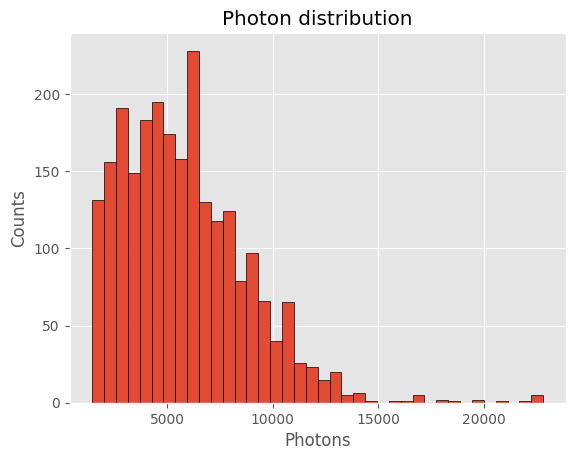

In [3]:
# Plot some basic statistics using seaborn, i.e. photon distribution   
plt.hist(locs["photons"], bins='auto', edgecolor='black')
plt.title('Photon distribution')
plt.xlabel("Photons")
plt.ylabel("Counts")
plt.show()

#### let's look at example picked localizations

In [4]:
# load picked loaclizations 
picked, picked_info = io.load_locs("data/raw_movie_locs_picked.hdf5")
# Calculate mean of each column per group (pick):
picked.groupby('group').mean().head()

,frame,x,y,photons,sx,sy,bg,lpx,lpy,ellipticity,net_gradient
group,,,,,,,,,,,
0,2090.515748,13.831293,7.768686,5078.762695,0.874179,0.866749,41.152176,0.020512,0.020376,0.023197,11765.627930
1,2473.941860,11.132995,8.156975,6392.565918,0.876934,0.871626,40.107822,0.017048,0.016970,0.022320,15007.785156
2,2557.320463,15.870498,12.424784,5304.414062,0.868558,0.866011,41.594315,0.019585,0.019544,0.020237,12153.112305
3,2061.792398,8.770592,19.935226,6044.544922,0.869653,0.868299,42.966442,0.018722,0.018690,0.019398,14050.625977
4,2427.960317,13.192513,22.455158,6178.497559,0.872494,0.868146,42.648525,0.018026,0.017970,0.021093,14019.303711


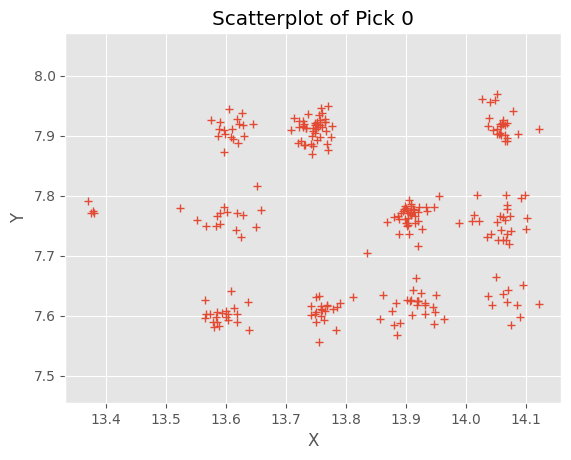

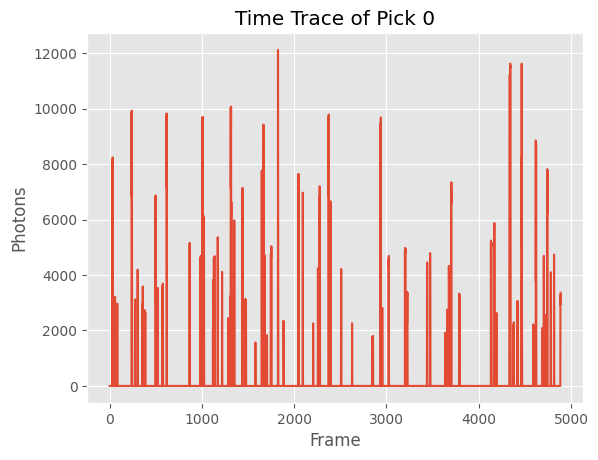

In [5]:
# Display a scatterplot of localizations of group 0
# Select pick 0
pick_one = picked[picked.group == 0]

# Scatterplot
plt.plot(pick_one['x'], pick_one['y'],'+')
plt.axis('equal')
plt.title('Scatterplot of Pick 0')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Time trace with photon values
xvec = np.arange(max(pick_one["frame"]) + 1)
yvec = xvec[:] * 0
yvec[pick_one["frame"]] = pick_one['photons']

plt.plot(xvec, yvec)
plt.title('Time Trace of Pick 0')
plt.xlabel('Frame')
plt.ylabel('Photons')
plt.show()


## Info file
Back to the original localizations. The info file is now a list of dictionaries. Each step in picasso adds an element to the list.

In [6]:
for i in range(len(info)):
    print(f"Generated by: {info[i]['Generated by']}")
    
# extract width and height:
width, height = info[0]['Width'], info[0]['Height']
print(f'Image height: {height}, width: {width}')
pixelsize = info[0]["Pixelsize"]  # camera pixel size

Generated by: Picasso v0.9.1 Simulate
Generated by: Picasso Sample Notebook Localize
Image height: 32, width: 32


## Calculate NeNA - experimental localization precision

In [7]:
_, nena = postprocess.nena(locs, info)
nena *= pixelsize  # convert to nm
print(f"Experimental loc. precision: {nena:.1f} nm")

Experimental loc. precision: 1.6 nm


## Filter localizations

Filter localizations, i.e., via sx and sy: Remove all localizations that are not within a circle around a center position.

In [8]:
sx_center = 0.82  # units of camera pixels! in our case, pixelsize = 130 nm
sy_center = 0.82

radius = 0.04 

to_keep = (locs.sx-sx_center)**2 + (locs.sy-sy_center)**2 < radius**2

filtered_locs = locs[to_keep]
print(f'Length of locs before filtering {len(locs)}, after filtering {len(filtered_locs)}.')

Length of locs before filtering 2399, after filtering 160.


## Undrifting
Real world data requires undrifting (unless an active stage stabilization is implemented). Here, we show the interface to use AIM, see https://doi.org/10.1126/sciadv.adm7765.

Note: we use synthetic data here, so undrifting is not needed.

In [9]:
help(aim.aim)

Help on function aim in module picasso.aim:

aim(locs: pandas.core.frame.DataFrame, info: list[dict], segmentation: int = 100, intersect_d: float = 0.15384615384615385, roi_r: float = 0.46153846153846156, progress: Optional[Callable[[int], NoneType]] = None) -> tuple[pandas.core.frame.DataFrame, list[dict], pandas.core.frame.DataFrame]
    Apply AIM undrifting to the localizations.
    
    Parameters
    ----------
    locs : pd.DataFrame
        Localizations list to be undrifted.
    info : list of dicts
        Localizations list's metadata.
    intersect_d : float
        Intersect distance in camera pixels.
    segmentation : int
        Time interval for drift tracking, unit: frames.
    roi_r : float
        Radius of the local search region in camera pixels. Should be
        larger than the  maximum expected drift within segmentation.
    progress : picasso.lib.ProgressDialog, optional
        Progress dialog. If None, progress is displayed with into the
        console. Defa

In [10]:
undrifted_locs, undrifted_info, drift = aim.aim(locs, info)

In [11]:
drift.head()

,x,y
0,-0.012017,-0.076087
1,-0.012011,-0.073864
2,-0.012007,-0.071676
3,-0.012004,-0.069523
4,-0.012003,-0.067405


Note: Picasso supports two other undrifting modalities - RCC (https://doi.org/10.1364/OE.22.015982, ``picasso.postprocess.undrift``) and undrifting from picked localizations (usually based on fiducial markers) (``picasso.imageprocess.find_fiducials``, ``picasso.postprocess.picked_locs`` and ``picasso.postprocess.undrift_from_picked``)

## Saving localizations
Add new info to the yaml file and save everything.

In [12]:
# Create a new dictionary for the new info
new_info = {}
new_info["Generated by"] = "Picasso Jupyter Notebook"
new_info["Filtered"] = 'Circle'
new_info["sx_center"] = sx_center
new_info["sy_center"] = sy_center
new_info["radius"] = radius

info.append(new_info)
new_path = path.replace('.hdf5', '_fitted_sigma_filter.hdf5')

io.save_locs(new_path, filtered_locs, info)

print(f'{len(filtered_locs)} locs saved to {new_path}.')

160 locs saved to data/raw_movie_locs_fitted_sigma_filter.hdf5.


## Manually export images
Use the picasso functions to render images.

In [13]:
# Get minimum / maximum localizations to define the ROI to be rendered 
x_min = 0
x_max = width
y_min = 0
y_max = height

viewport =  (y_min, x_min), (y_max, x_max)
oversampling = 100  # number of display pixels per camera pixel, display pixel size = camera pixel size / oversampling
blur_method = "smooth"  # one pixel blur
len_x, image = render.render(locs, viewport=viewport, oversampling=oversampling, blur_method=blur_method)
plt.imsave('data/example_render.png', image, cmap='hot', vmax=1)
plt.close()

# Custom ROI with higher oversampling
viewport =  (19.45, 8.25), (20.45, 9.25)  # (y_min, x_min), (y_max, x_max), units of camera pixels
oversampling = 500  # number of display pixels per camera pixel, display pixel size = camera pixel size / oversampling
blur_method = "gaussian"  # individual localization precision
len_x, image = render.render(locs, viewport = viewport, oversampling=oversampling, blur_method=blur_method)
plt.imsave('data/example_render_zoom.png', image, cmap='hot')
plt.close()

## Calculate kinetics
Use the picasso functions to calculate kinetics.

In [14]:
# Note: to calculate dark times you need picked localizations of single binding sites
path = 'data/raw_movie_locs_picked_single.hdf5'
picked_locs, info = io.load_locs(path)

# Link localizations and calculate dark times
linked_locs = postprocess.link(picked_locs, info, r_max=0.05, max_dark_time=1)
linked_locs_dark = postprocess.compute_dark_times(linked_locs)

print('Average bright time {:.2f} frames'.format(np.mean(linked_locs_dark.n)))
print('Average dark time {:.2f} frames'.format(np.mean(linked_locs_dark.dark)))

# Compare with simulation settings:
integration_time = info[0]['Camera.Integration Time']
tau_b = info[0]['PAINT.taub']
k_on = info[0]['PAINT.k_on']
imager = info[0]['PAINT.imager']
tau_d = 1/(k_on*imager)*10**9*1000

print('------')

print(f'ON Measured {(np.mean(linked_locs_dark.n)*integration_time):.2f} ms \t Simulated {tau_b:.2f} ms')
print(f'OFF Measured {(np.mean(linked_locs_dark.dark)*integration_time):.2f} ms \t Simulated {tau_d:.2f} ms')
print('\nNote: some error is expected due to low localization count per site!')

Average bright time 2.91 frames
Average dark time 528.89 frames
------
ON Measured 291.22 ms 	 Simulated 333.00 ms
OFF Measured 52888.85 ms 	 Simulated 66666.67 ms

Note: some error is expected due to low localization count per site!
